In [ ]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

data=pd.read_csv("project.csv" )
columns_to_keep = ['year','g']
df = data[columns_to_keep]
df['year'] = pd.to_datetime(df['year'])
df.set_index('year', inplace=True)
df

<ipython-input-1-5e75dce84160>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_datetime(df['year'])


,g
year,
1960-01-01,1.369444e+12
1961-01-01,1.425115e+12
1962-01-01,1.530069e+12
1963-01-01,1.648305e+12
1964-01-01,1.805674e+12
...,...
2018-01-01,8.643942e+13
2019-01-01,8.779853e+13
2020-01-01,8.297824e+13


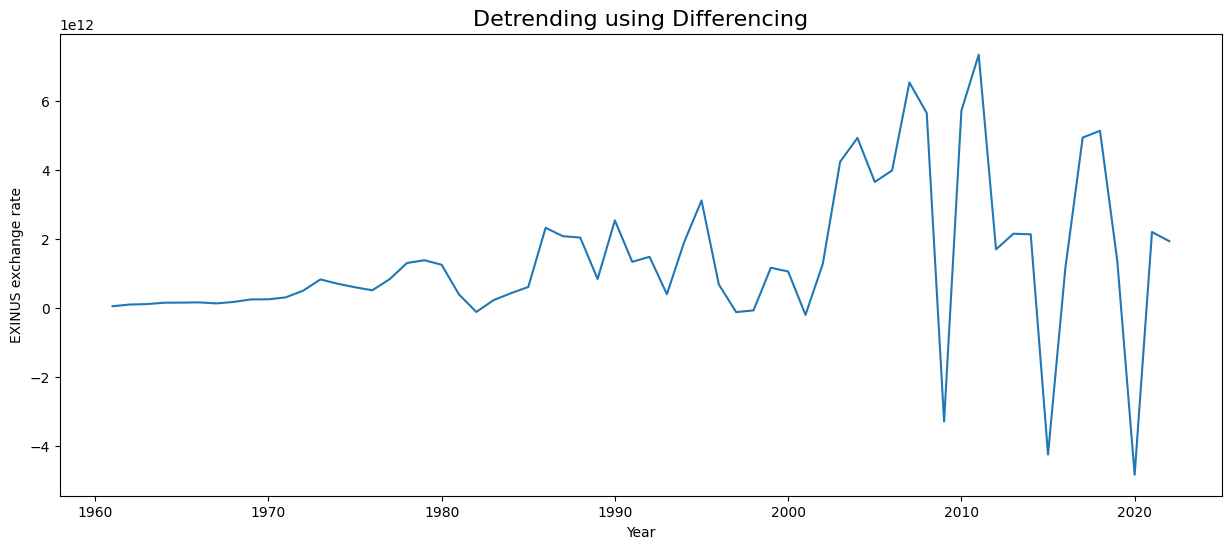

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
diff = df.g.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

In [ ]:
diff

year
1960-01-01             NaN
1961-01-01    5.567116e+10
1962-01-01    1.049537e+11
1963-01-01    1.182361e+11
1964-01-01    1.573690e+11
                  ...     
2018-01-01    5.133393e+12
2019-01-01    1.359103e+12
2020-01-01   -4.820281e+12
2021-01-01    2.203082e+12
2022-01-01    1.937648e+12
Name: g, Length: 63, dtype: float64

In [ ]:
import pandas as pd

# Assuming your data is stored in a variable called 'data'

# Check if it is a DataFrame
if isinstance(diff, pd.DataFrame):
    print("The data is a pandas DataFrame.")

# Check if it is a Series
elif isinstance(diff, pd.Series):
    print("The data is a pandas Series.")

# If it is neither a DataFrame nor a Series
else:
    print("The data does not appear to be a pandas DataFrame or Series.")

The data is a pandas Series.


In [ ]:
import pandas as pd

# Assuming your Series is stored in a variable called 'series_data'

# Convert Series to DataFrame
dataframe = diff.to_frame()

# Print the resulting DataFrame
dataframe

,g
year,
1960-01-01,NaN
1961-01-01,5.567116e+10
1962-01-01,1.049537e+11
1963-01-01,1.182361e+11
1964-01-01,1.573690e+11
...,...
2018-01-01,5.133393e+12
2019-01-01,1.359103e+12
2020-01-01,-4.820281e+12


In [ ]:


# Check for missing values in each column
missing_values = dataframe.isnull().sum()

# Print the results
missing_values

g    1
dtype: int64

In [ ]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called 'df_copy'
df_copy = dataframe.copy()
# Backward fill the first missing value
df_copy['g'].fillna(method='bfill', inplace=True)

# Print the updated DataFrame
print(df_copy)

                       g
year                    
1960-01-01  5.567116e+10
1961-01-01  5.567116e+10
1962-01-01  1.049537e+11
1963-01-01  1.182361e+11
1964-01-01  1.573690e+11
...                  ...
2018-01-01  5.133393e+12
2019-01-01  1.359103e+12
2020-01-01 -4.820281e+12
2021-01-01  2.203082e+12
2022-01-01  1.937648e+12

[63 rows x 1 columns]


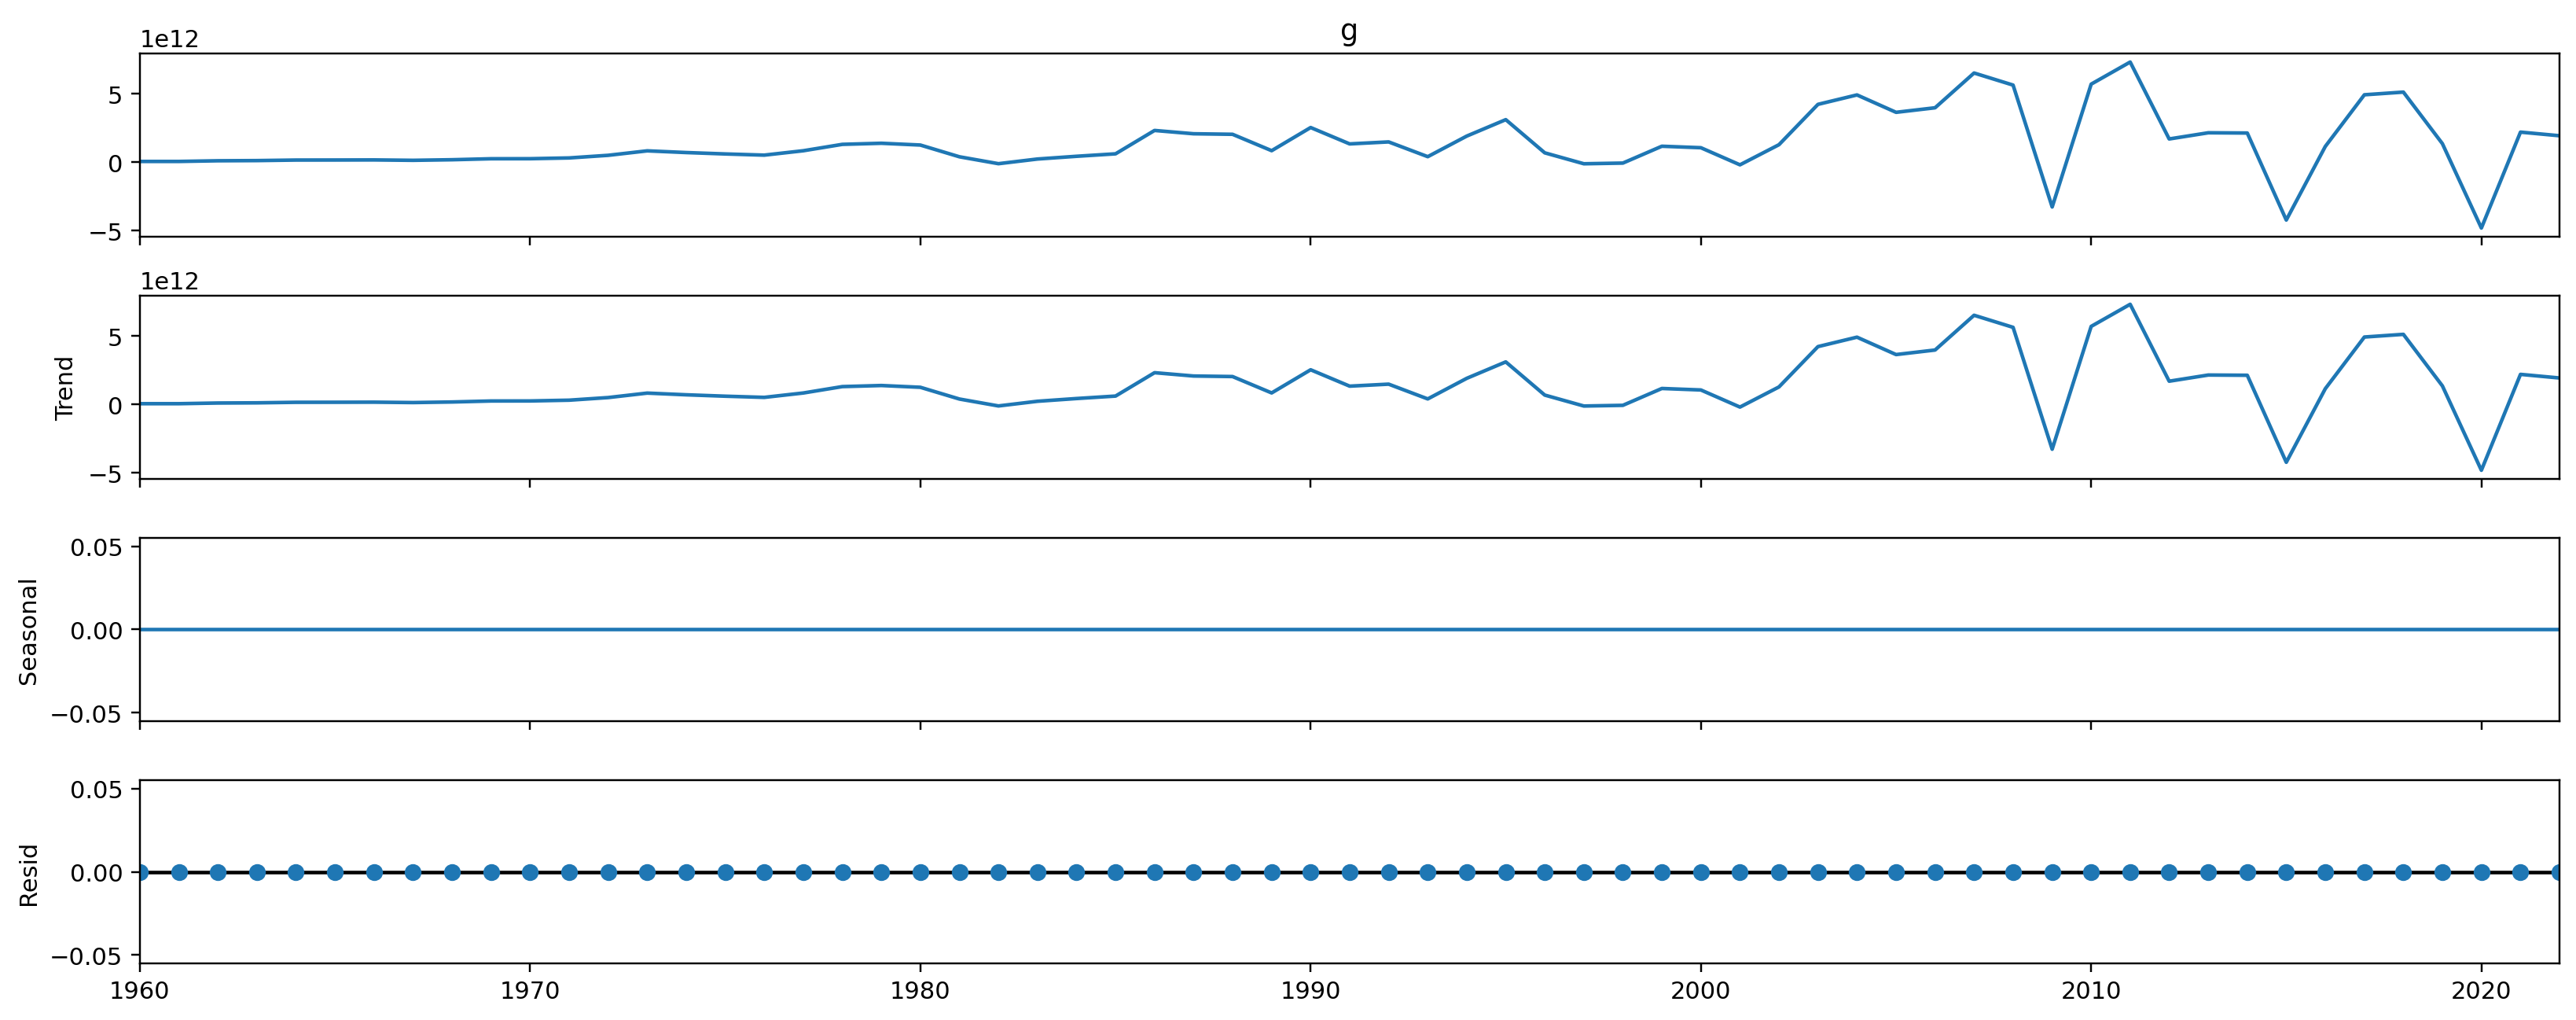

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
result = seasonal_decompose(df_copy['g'], model='add')
#result = seasonal_decompose(df_copy['g'], model='mul')
result.plot();